**Customer Shopping Trends handling categorical targte values** <br>
https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset <br>

Worked with categorical target values and explored converting the categories to ordinal values. Implemented Decision Tree on the unbalanced and balanced data and compared the results. At the end used mutual information matrix to see how informative our features are.


In [134]:
library(caret)
library(rpart)
library(rpart.plot)
library(partykit)

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



In [135]:
st = read.csv("shopping_trends.csv", stringsAsFactors = TRUE)

In [136]:
#Check to see if there is any null value
sum(is.na(st))

[1] 0

In [137]:
#frequency table of the Frequency.of.Purchases column
table(st$Frequency.of.Purchases)


      Annually      Bi-Weekly Every 3 Months    Fortnightly        Monthly 
           572            547            584            542            553 
     Quarterly         Weekly 
           563            539 

**Encode the Frequency.of.Purchases column**

In [138]:
levels(st$Frequency.of.Purchases)

[1] "Annually"       "Bi-Weekly"      "Every 3 Months" "Fortnightly"   
[5] "Monthly"        "Quarterly"      "Weekly"

Bi_Weekly and Fortnightly are synonyms.
Every 3 Months and Quarterly are synonyms. \
Therefore we will map these levels to the equivalent values as the period length in days: \

'Annually'--> 365 \
'Bi-Weekly'-->14 \
'Every 3 Months'-->90 \
'Fortnightly'-->14 \
'Monthly'-->30 \
'Quarterly'-->90 \
'Weekly'-->7 


**Ordinal Factor**

In [139]:
#Eliminate duplicated categories
st$Frequency.of.Purchases[which(st$Frequency.of.Purchases == "Fortnightly")] = "Bi-Weekly"
st$Frequency.of.Purchases[which(st$Frequency.of.Purchases == "Every 3 Months")] = "Quarterly"

#Convert to numerical values equivalent to the time frequencies. And then turn it to an ordinal factor column
levels(st$Frequency.of.Purchases) = as.character(c(365, 14, 90, 14, 30, 90, 7))
st$Frequency.of.Purchases = factor(st$Frequency.of.Purchases, order = TRUE, levels = c("7", "14", "30", "90", "365"))
head(st)

,Customer.ID,Age,Gender,Item.Purchased,Category,Purchase.Amount..USD.,Location,Size,Color,Season,Review.Rating,Subscription.Status,Payment.Method,Shipping.Type,Discount.Applied,Promo.Code.Used,Previous.Purchases,Preferred.Payment.Method,Frequency.of.Purchases
,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<ord>
1,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,14
2,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,14
3,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,7
4,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,7
5,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,365
6,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,7


In [140]:
class(st$Frequency.of.Purchases)

[1] "ordered" "factor"

In [141]:
table(st$Frequency.of.Purchases )


   7   14   30   90  365 
 539 1089  553 1147  572 

Notice that the frequency of 14 and 90 is almost double the 7, 30 and 365.

**Split the data into train and test**

In [142]:
#drop Location column because it has too many categories and does not work with our decision tree
#drop Customer.ID column since it is not helpful in our prediciton
set.seed(12)
train_rows = sample(nrow(st), nrow(st) * 0.7)
st_train = st[train_rows,-c(1, 7)]
st_test = st[-train_rows,-c(1, 7)]

**Decision Tree Model**

In [143]:
tree_model = rpart(Frequency.of.Purchases ~ ., data = st_train, method = "class")
summary(tree_model)

Call:
rpart(formula = Frequency.of.Purchases ~ ., data = st_train, 
    method = "class")
  n= 2730 

          CP nsplit rel error   xerror       xstd
1 0.03103983      0 1.0000000 1.000000 0.01228943
2 0.01603725      1 0.9689602 1.000000 0.01228943
3 0.01000000      2 0.9529229 0.996896 0.01231645

Variable importance
         Color Item.Purchased       Category 
            52             40              7 

Node number 1: 2730 observations,    complexity param=0.03103983
  predicted class=90  expected loss=0.7080586  P(node) =1
    class counts:   394   760   385   797   394
   probabilities: 0.144 0.278 0.141 0.292 0.144 
  left son=2 (1784 obs) right son=3 (946 obs)
  Primary splits:
      Color              splits as  LLLRLLRLLLLRRLRRRLLLRLLRL, improve=6.619657, (0 missing)
      Item.Purchased     splits as  LRLLLRLRRLRRLRLLLLLRLRLLR, improve=5.518119, (0 missing)
      Previous.Purchases < 35.5 to the left,  improve=3.801971, (0 missing)
      Age                < 31.5 to the

The primary splits of our model are color, item purchased, previous purchases, age and payment method. 

In [144]:
#Prediction of our model on test data set
predicted_test = predict(tree_model, newdata=st_test, type = "class")

**Visualize the tree**

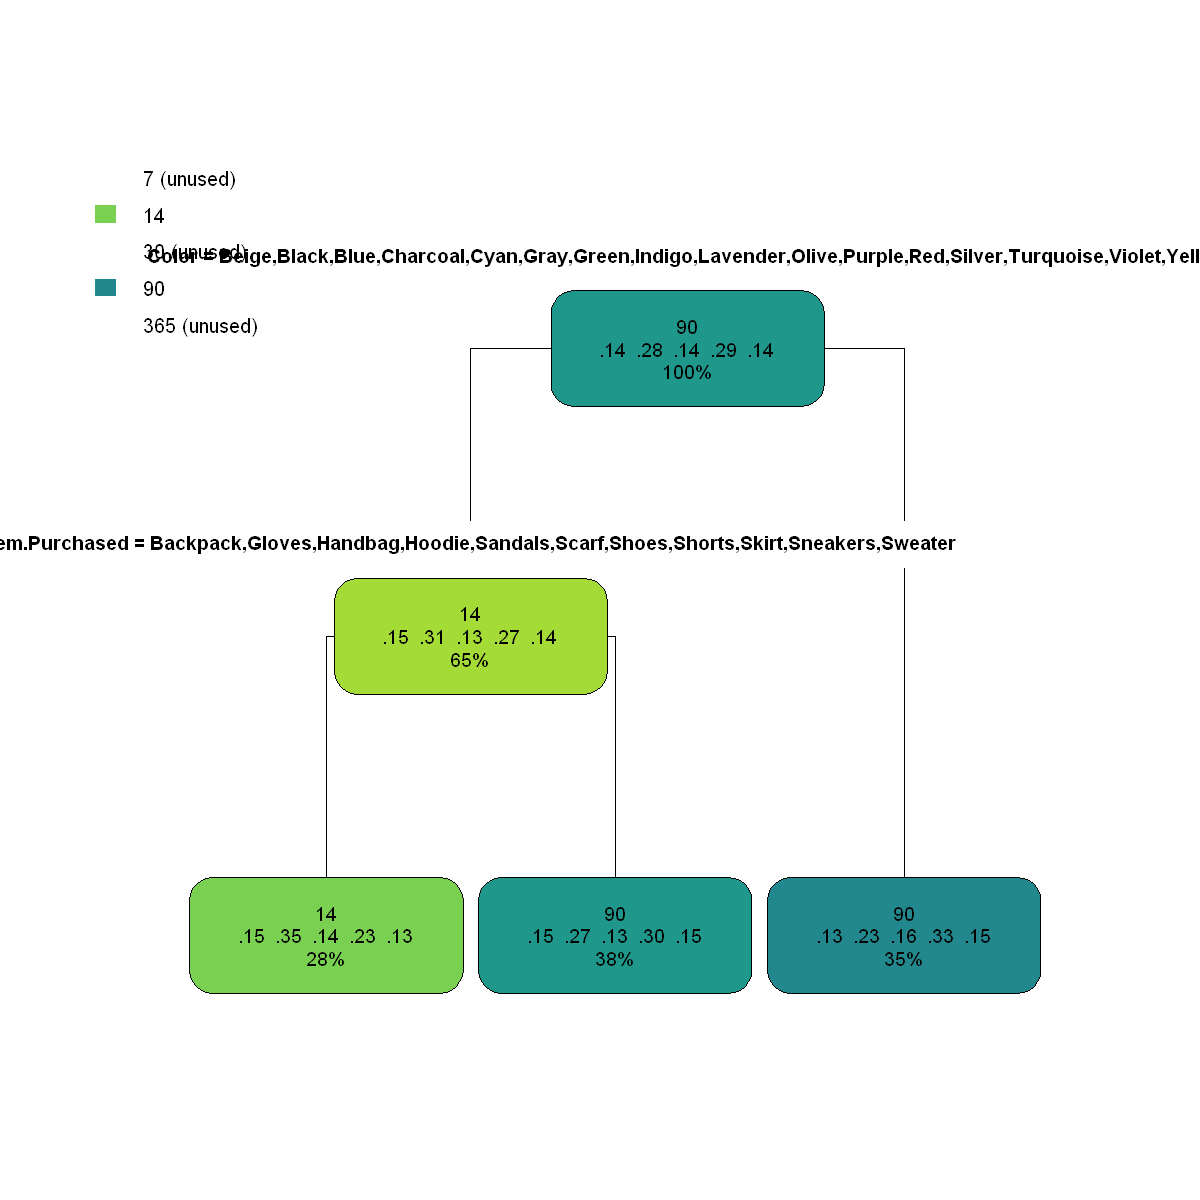

In [145]:
options(repr.plot.width =10 , repr.plot.height =10)
rpart.plot(tree_model, box.palette = "YlGnBl" ,type =1)

**Confusion Matrix**

In [146]:
confusionMatrix(predicted_test, st_test$Frequency.of.Purchases)

Confusion Matrix and Statistics

          Reference
Prediction   7  14  30  90 365
       7     0   0   0   0   0
       14   36  94  41 111  45
       30    0   0   0   0   0
       90  109 235 127 239 133
       365   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.2846          
                 95% CI : (0.2589, 0.3114)
    No Information Rate : 0.2991          
    P-Value [Acc > NIR] : 0.8683          
                                          
                  Kappa : -0.0135         
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 7 Class: 14 Class: 30 Class: 90 Class: 365
Sensitivity            0.0000   0.28571    0.0000    0.6829     0.0000
Specificity            1.0000   0.72295    1.0000    0.2634     1.0000
Pos Pred Value            NaN   0.28746       NaN    0.2835        NaN
Neg Pred Value         0.8761   0.72123    0.85

In [147]:
#Distribution of frequency in our response value of our test set
table(st_test$Frequency.of.Purchases)


  7  14  30  90 365 
145 329 168 350 178 

**Discussion:**
The tree is only predicting classes 14 and 90 (bi-weekly and quarterly), and it does not predict data as labels 7, 30 and 365 in any of its terminal nodes.
This could be due to the higher frequency of categories 14 and 90 in our unbalanced data. And the accuracy is pretty low (28%) too.

**Labels, Predictions and their distances**

In [149]:
#Create a dataframe showing the labels and the predictions side by side
labels_predictions = as.data.frame(list("labels" = st_test$Frequency.of.Purchases, "predictions" = predicted_test))
labels_predictions

,labels,predictions
,<ord>,<fct>
2,14,90
5,365,90
6,7,90
12,14,14
13,14,90
21,90,90
22,90,90
29,90,14
32,30,90


In [150]:
label = labels_predictions$labels
pred = labels_predictions$predictions

#Define a function that takes an ordinal column and a vector of order and gives the ranking of each value of the column.
checking=function(x){match(x, c("7", "14", "30", "90", "365"))}

#Use the function to get the ranking of each value in pred and label columns and compare them with each other(distances)
#Show the distribution of the distances of label and pred column in a frequency matrix
print("Accuracies, Inaccuracies and the Distances")
table(abs(unlist(lapply(pred, checking)) - unlist(lapply(label, checking))))

[1] "Accuracies, Inaccuracies and the Distances"



  0   1   2   3 
333 337 346 154 

There are 333 predicted values that have zero distance from their actual label.(Accurately predicted)

The most frequent inaccuracy has the distance of 2 from their actual label. (for example, if actual label = 7 and prediction = 30)
In conclusion, our model has predicted a lot of the data inaccurately and mainly the distance between the actual and predicted labels is 2. \
Since the response column is ordinal, the model tried to have the minimum inaccuracies with the distance of 3 (only 154 of the labels and predictions have an inaccuracy with distance of 3).

**Exploring the option of balancing our data**

We can oversample and undersample our data to see if our tree model would have all the categories of our response column in its terminal nodes.

In [189]:
#Undersampling from rows with label 14 and 90 and oversampling from rows with labels 7, 30 and 365
rows_7 = which(st$Frequency.of.Purchases == "7")
rows_14 = which(st$Frequency.of.Purchases == "14")
rows_30 = which(st$Frequency.of.Purchases == "30")
rows_90 = which(st$Frequency.of.Purchases == "90")
rows_365 = which(st$Frequency.of.Purchases == "365")

set.seed(12)
balance_rows_7= sort(sample(rows_7, 0.2 * nrow(st), replace =TRUE))
balance_rows_14= sort(sample(rows_14, 0.2 * nrow(st)))
balance_rows_30= sort(sample(rows_30, 0.2 * nrow(st), replace =TRUE))
balance_rows_90= sort(sample(rows_90, 0.2 * nrow(st)))
balance_rows_365= sort(sample(rows_365, 0.2 * nrow(st), replace =TRUE))

#Create a new balanced dataset
balanced_st = st[c(balance_rows_7, balance_rows_14, balance_rows_30, balance_rows_90, balance_rows_365),]

#Check to see the frequency
table(balanced_st$Frequency.of.Purchases)


  7  14  30  90 365 
780 780 780 780 780 

Now we have a balanced data, let's fit our model on the train set again and see what will change.

In [183]:
# split to train and test set
set.seed(12)
train_rows_b = sample(nrow(balanced_st), nrow(balanced_st) * 0.7)
st_train_b = balanced_st[train_rows_b,-c(1, 7)]
st_test_b = balanced_st[-train_rows_b,-c(1, 7)]

In [184]:
#fit decision tree model on our balanced train set
tree_model_b = rpart(Frequency.of.Purchases ~ ., data = st_train_b, method = "class")
predicted_test_b = predict(tree_model_b, newdata=st_test_b, type = "class")

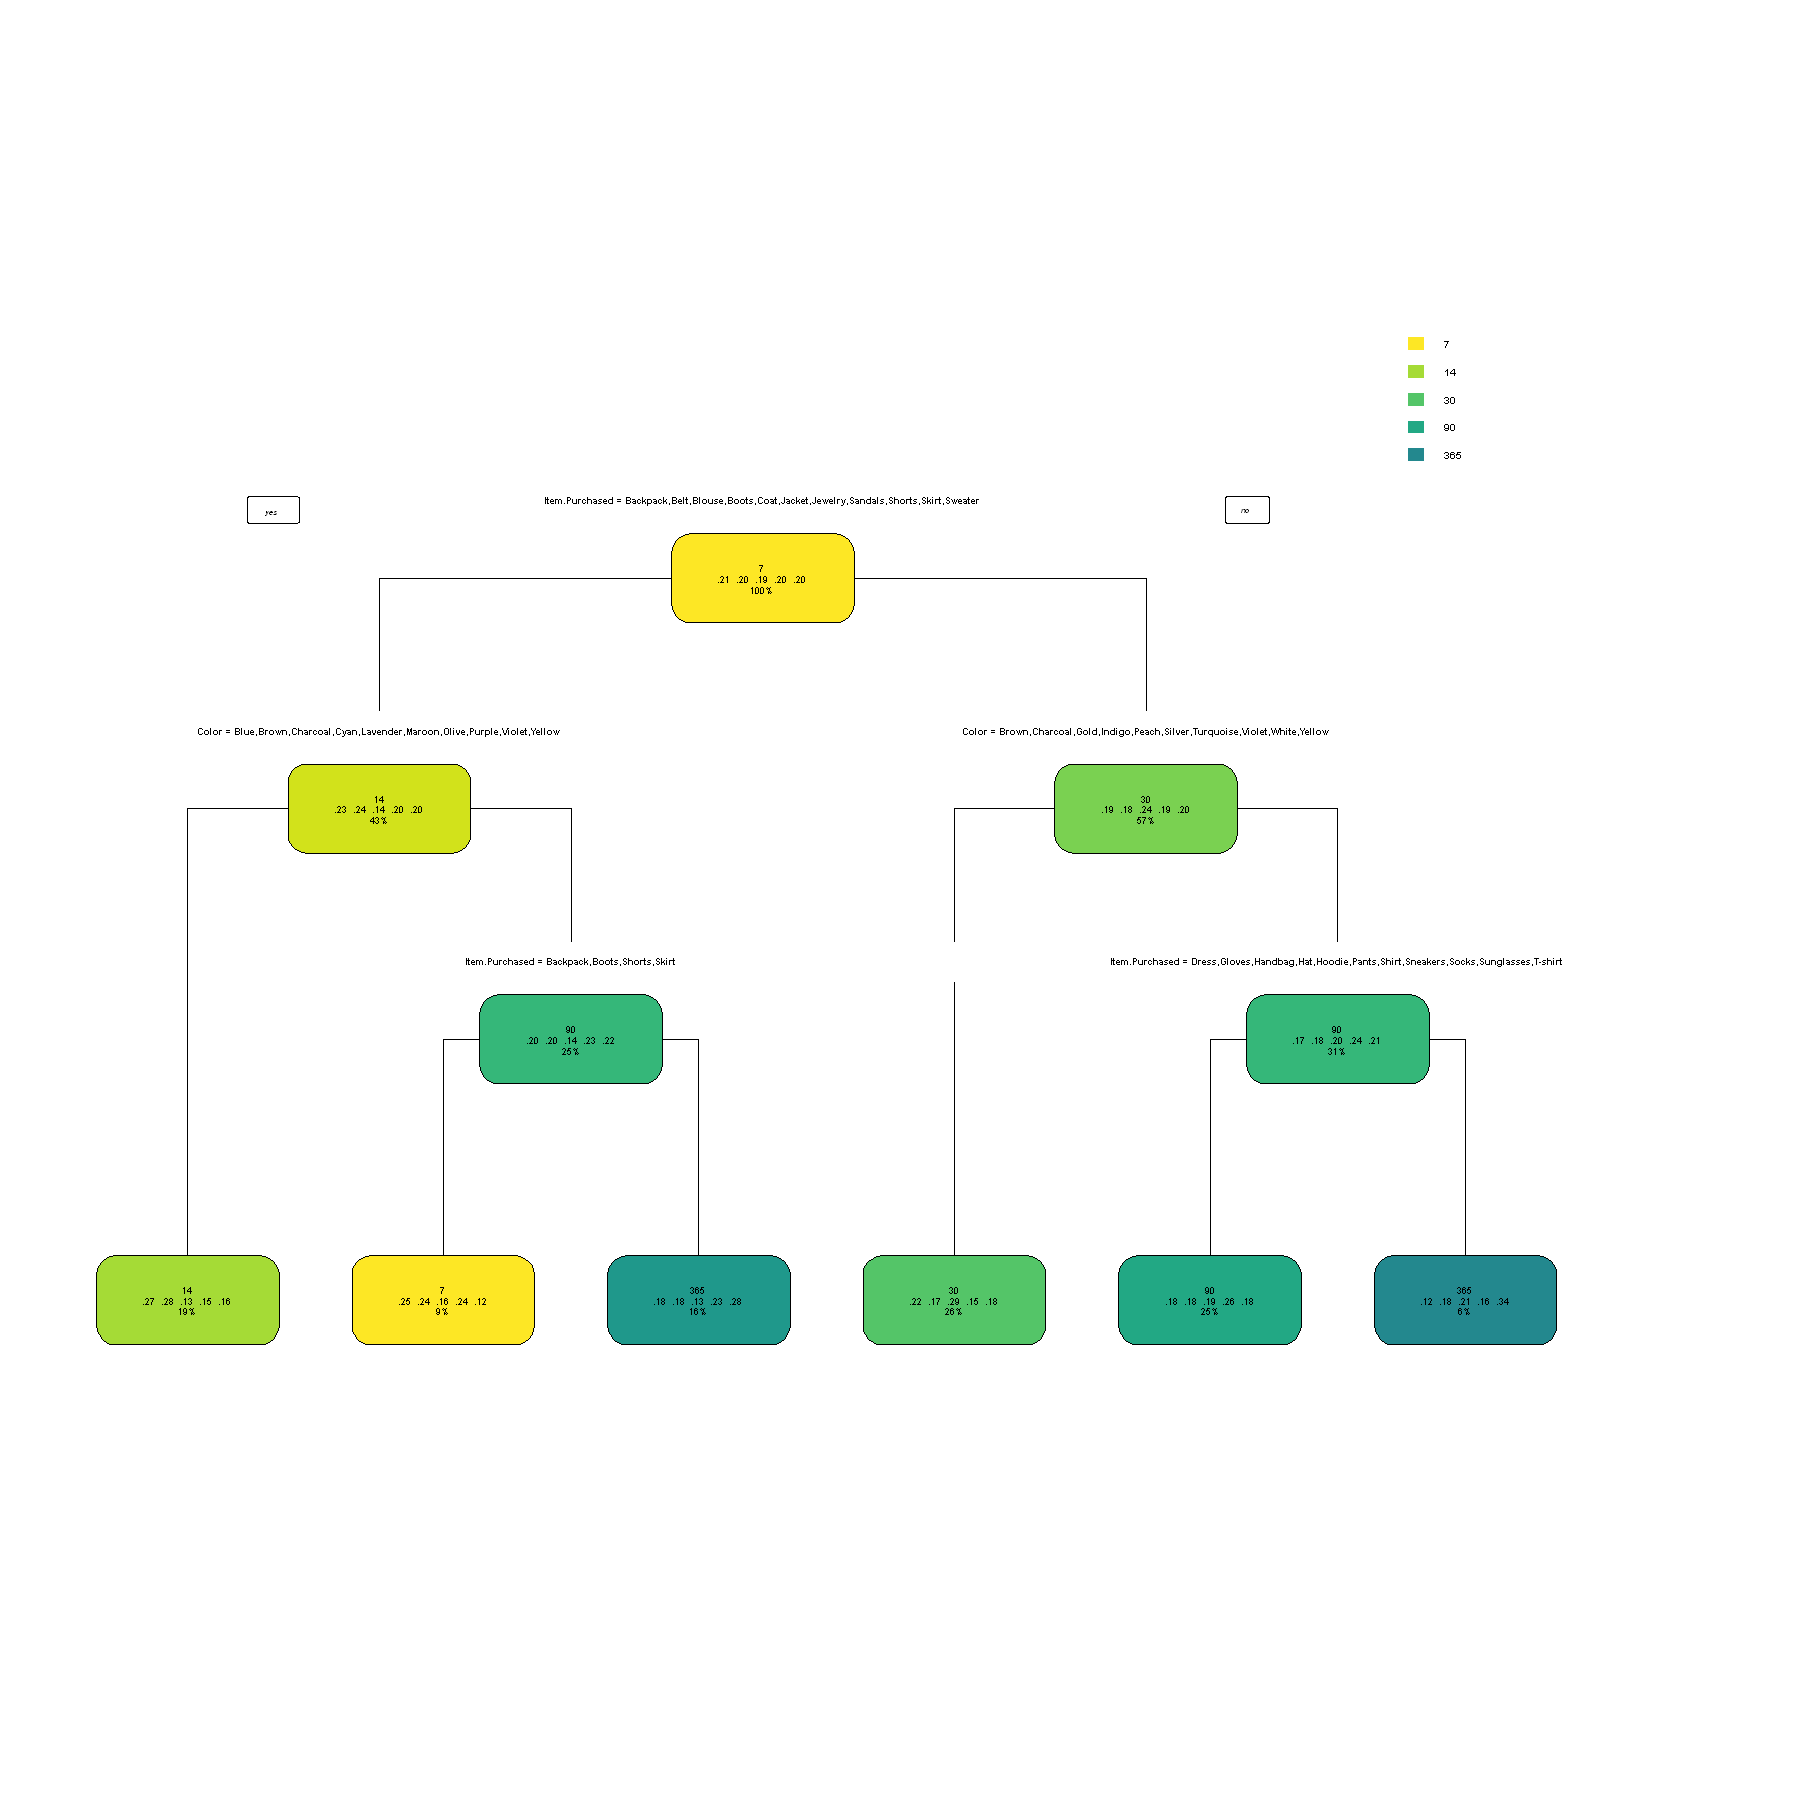

In [185]:
options(repr.plot.width =15 , repr.plot.height =15)
rpart.plot(tree_model_b, box.palette = "YlGnBl" ,type =1)

In [186]:
confusionMatrix(predicted_test_b, st_test_b$Frequency.of.Purchases)

Confusion Matrix and Statistics

          Reference
Prediction  7 14 30 90 365
       7   27 20 22 22  13
       14  42 36 29 44  44
       30  54 47 78 60  51
       90  50 65 67 56  48
       365 35 56 54 65  85

Overall Statistics
                                          
               Accuracy : 0.241           
                 95% CI : (0.2168, 0.2666)
    No Information Rate : 0.2137          
    P-Value [Acc > NIR] : 0.01318         
                                          
                  Kappa : 0.0463          
                                          
 Mcnemar's Test P-Value : 3.117e-08       

Statistics by Class:

                     Class: 7 Class: 14 Class: 30 Class: 90 Class: 365
Sensitivity           0.12981   0.16071   0.31200   0.22672    0.35270
Specificity           0.91996   0.83192   0.76957   0.75081    0.77395
Pos Pred Value        0.25962   0.18462   0.26897   0.19580    0.28814
Neg Pred Value        0.83021   0.80718   0.80455   0.78394    0.82171


While the new tree model on the balanced data has predictions as all of the categories of our response column, this did not increase the accuracy of the model. It means that although our dataset was balanced this time, the model was not able to partition the data properly to make a good prediction.

In [191]:
#Create the mutual information matrix
balanced_st = balanced_st[,-c(1,7)]
mi_matrix2 = matrix(data = NA, nrow = ncol(balanced_st), ncol = ncol(balanced_st))

#Fill in the mi matrix
for (i in 1:ncol(balanced_st) ){
    for (j in 1:ncol(balanced_st) ){
        mi_matrix2[i,j] = mutinformation(as.integer(balanced_st[,i]), as.integer(balanced_st[,j]))
        }
    }

In [195]:
balanced_st

,Age,Gender,Item.Purchased,Category,Purchase.Amount..USD.,Size,Color,Season,Review.Rating,Subscription.Status,Payment.Method,Shipping.Type,Discount.Applied,Promo.Code.Used,Previous.Purchases,Preferred.Payment.Method,Frequency.of.Purchases
,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<ord>
3,50,Male,Jeans,Clothing,73,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,7
3.1,50,Male,Jeans,Clothing,73,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,7
4,21,Male,Sandals,Footwear,90,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,7
6,46,Male,Sneakers,Footwear,20,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,7
6.1,46,Male,Sneakers,Footwear,20,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,7
8,27,Male,Shorts,Clothing,34,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,7
19,52,Male,Sweater,Clothing,48,S,Black,Summer,4.6,Yes,Bank Transfer,Free Shipping,Yes,Yes,17,Cash,7
24,31,Male,Pants,Clothing,88,XL,White,Winter,4.4,Yes,Credit Card,Express,Yes,Yes,40,Credit Card,7
30,31,Male,Dress,Clothing,48,S,Black,Fall,4.1,Yes,Venmo,Store Pickup,Yes,Yes,14,Credit Card,7


In [194]:
uncertainty2 = sort(mi_matrix2[,17], index=TRUE, decreasing = TRUE)
names(uncertainty2) = c("Mutual Informarion", "Column Index")
uncertainty2

$`Mutual Informarion`
 [1] 1.6094379124 0.0855525637 0.0481309242 0.0435774822 0.0264018766
 [6] 0.0170209487 0.0063260780 0.0055992791 0.0053729075 0.0030298011
[11] 0.0023383751 0.0018453062 0.0015989129 0.0004839695 0.0001557068
[16] 0.0000287533 0.0000287533

$`Column Index`
 [1] 17  5  1 15  3  7 16 12 11  6  8  9  4 10  2 13 14

In [196]:
uncertainty2$"Mutual Informarion"[2] / uncertainty2$"Mutual Informarion"[1]

[1] 0.0531568

Above numbers are showing the connection between each feature and the response variable in decreasing order. <br>
The first value is our uncertainty about the response variable. <br>

The most informative feature (variable 5:Purchase.Amount..USD.) only explaines 5% of the uncertainty in the response variable and most of the other features are almost uninformative. This could be one of the reasons that our model accuracy was very low. In other words, our features are not informative.